# Pandas project 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
#pandas project=1
#SF-salaries
df=pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.shape

(148654, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [5]:
#what is the avarage Basepay?
df['BasePay'].mean()

66325.44884050643

In [6]:
#what is the highest amount of Overtime pay in the dataset?
df['OvertimePay'].max()

245131.88

In [7]:
#what is the jobtitle of JOSEPH DRISCOLL?
df[df['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [8]:
#how much does JOSEPH DRISCOLL makes including benefits?
df[df['EmployeeName']=='JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

In [9]:
#what is the name of highest paid person including benefits?
df['TotalPayBenefits'].max()

567595.43

In [10]:
df[df['TotalPayBenefits']==df['TotalPayBenefits'].max()]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [11]:
df['TotalPayBenefits'].idxmax()

0

In [12]:
df.iloc[df['TotalPayBenefits'].idxmax()]['EmployeeName']

'NATHANIEL FORD'

In [13]:
#what is the name of lowest paid person including benefits?
df['TotalPayBenefits'].min()


-618.13

In [14]:
df[df['TotalPayBenefits']==df['TotalPayBenefits'].min()]['EmployeeName']

148653    Joe Lopez
Name: EmployeeName, dtype: object

In [15]:
df['TotalPayBenefits'].idxmin()

148653

In [16]:
df.iloc[df['TotalPayBenefits'].argmin()]['EmployeeName']

'Joe Lopez'

In [17]:
#what is the average basepay of all employees per year?
df.groupby('Year').mean()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Notes,Status
Year,,,,,,,,,
2011,18080.0,63595.956517,4531.065429,3617.081926,NaN,71744.103871,71744.103871,NaN,NaN
2012,54542.5,65436.406857,5023.417824,3653.437583,26439.966967,74113.262265,100553.229232,NaN,NaN
2013,91728.5,69630.030216,5281.641980,3819.969007,23829.076572,77611.443142,101440.519714,NaN,NaN
2014,129593.0,66564.421924,5401.993737,3505.421251,24789.601756,75463.918140,100250.918884,NaN,NaN


In [18]:
df.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [19]:
#how many unique job titles are there?
df['JobTitle'].nunique()

2159

In [20]:
#what are the top 5 most comman jobs?
df['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [21]:
#how many job titles are represented by only one person in 2013?
sum(df[df['Year']==2013]['JobTitle'].value_counts()==1)

202

In [22]:
#how many peoples have the word "chief" in their JobTile?
def chief_string(title):
    if "chief" in title.lower().split():
        return True
    else:
        return False

In [23]:
print(chief_string("engineer"))

False


In [24]:
sum(df['JobTitle'].apply(chief_string))

477

In [25]:
#is there any relationship btn length of job title and salary?
df['jobtitle_length']=df['JobTitle'].apply(len)

In [26]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,jobtitle_length
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,46
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,31
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,31
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,36
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,44


In [27]:
df[['jobtitle_length','TotalPayBenefits']].corr()

,jobtitle_length,TotalPayBenefits
jobtitle_length,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


# Pandas project 2

In [28]:
#pandas project 2
import pandas as pd
import numpy as np

In [29]:
df=pd.read_csv('Ecommerce Purchases')
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [30]:
df.shape

(10000, 14)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [32]:
df.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

In [33]:
#what is avearge purchase price?
df['Purchase Price'].mean()

50.34730200000025

In [34]:
#what are the highest and lowest purchase prices?
df['Purchase Price'].max()

99.99

In [35]:
df['Purchase Price'].min()

0.0

In [36]:
#how many peoples have english "en" as their language of choice on website?
df[df['Language']=='en']['Language'].count()


1098

In [37]:
a=df.groupby('Language')
a.get_group("en").count()[11]

1098

In [38]:
#how many peoples have job title of "Lawyer"?
df[df['Job']=="Lawyer"]['Job'].count()

30

In [39]:
#how many peoples made purchase during the AM and how many peoples made the purchase during the PM?
df['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [40]:
#what are the 5 most comman job titles?
df['Job'].value_counts().head()

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: Job, dtype: int64

In [41]:
#someone made purchase that came from Lot:"90 WT",what was the purchase price of that transaction?

df[df['Lot']=="90 WT"]['Purchase Price']


513    75.1
Name: Purchase Price, dtype: float64

In [42]:
#what is the email of person with following credit card no. 4926535242672853?
df[df['Credit Card']==4926535242672853]['Email']

1234    bondellen@williams-garza.com
Name: Email, dtype: object

In [43]:
#ONE HOT ENCODING
#pd.get_dummies()
#to convert categorical columns to numeric columns
import pandas as pd
df = pd.DataFrame({'Name':['John Smith', 'Mary Brown','Rishi kakde'],
                     'Gender':['M', 'F','M'], 'Smoker':['Y', 'N','N']})
df

,Name,Gender,Smoker
0,John Smith,M,Y
1,Mary Brown,F,N
2,Rishi kakde,M,N


In [44]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [45]:
df['Smoker'].unique()

array(['Y', 'N'], dtype=object)

In [46]:
varlist=['Gender','Smoker']

In [47]:
df[varlist]=df[varlist].apply(lambda x:x.map({'Y':1,"N":0,'M':1,'F':0}))

In [48]:
df[varlist]

,Gender,Smoker
0,1,1
1,0,0
2,1,0


In [49]:
import pandas as pd

ids = [11, 22, 33, 44, 55, 66, 77]
countries = ['Spain', 'France', 'Spain', 'Germany', 'France']

df = pd.DataFrame(list(zip(ids, countries)),
                  columns=['Ids', 'Countries'])

In [50]:
df

,Ids,Countries
0,11,Spain
1,22,France
2,33,Spain
3,44,Germany
4,55,France


In [51]:
df['Countries'].unique()

array(['Spain', 'France', 'Germany'], dtype=object)

In [52]:
pd.get_dummies(df['Countries'])

,France,Germany,Spain
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,1,0,0


In [53]:
dummy=pd.get_dummies(df['Countries'],drop_first=True)
dummy

,Germany,Spain
0,0,1
1,0,0
2,0,1
3,1,0
4,0,0


In [54]:
df=pd.concat([df,dummy],axis=1)
df

,Ids,Countries,Germany,Spain
0,11,Spain,0,1
1,22,France,0,0
2,33,Spain,0,1
3,44,Germany,1,0
4,55,France,0,0


In [55]:
df=df.drop(df[['Countries']],axis=1)
df

,Ids,Germany,Spain
0,11,0,1
1,22,0,0
2,33,0,1
3,44,1,0
4,55,0,0


In [56]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [57]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [58]:
furnished_dummy=pd.get_dummies(df['furnishingstatus'],drop_first=True)
furnished_dummy

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [59]:
df=pd.concat([df,furnished_dummy],axis=1)

In [60]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0,0


In [61]:
df=df.drop(df[['furnishingstatus']],axis=1)

In [62]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,0,0


In [63]:
df['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [64]:
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[varlist]= df[varlist].apply(lambda x:x.map({'yes':1,'no':0}))

In [65]:
df[varlist]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [66]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### next part on Seaborn

# Project base on pandas and seaborn project 1

In [67]:
#data science project 1
#911 calls
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [68]:
df=pd.read_csv('911.csv')
df.head(10)
#lat=lattitude,string
#lng=longitude
#desc=description
#zip=zipcode
#title=title
#timestamp=YY-MM-DD
#twp=township
#addr=address
#e=dummy variable(always 1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [69]:
df.shape

(99492, 9)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [71]:
#what are the top 5 zip codes from 911 calls?
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [72]:
#what are the top 5 townships(twp) from 911 calls?
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [73]:
#how many unique title codes are there?
df['title'].nunique()

110

In [74]:
#in the title column there are Reasons specified before the title code.these are EMS,Fire and Traffic.
x=df['title'][0]
x

'EMS: BACK PAINS/INJURY'

In [75]:
x.split(':')

['EMS', ' BACK PAINS/INJURY']

In [76]:
x.split(':')[0]

'EMS'

In [77]:
def reason(title):
    return title.split(":")[0]

In [78]:
df['Reason']=df['title'].apply(reason)

In [79]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [80]:
#what is the most comman reason for 911 calls based on reason column?
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [81]:
#EMS is the comman reason.

<AxesSubplot:xlabel='Reason', ylabel='count'>

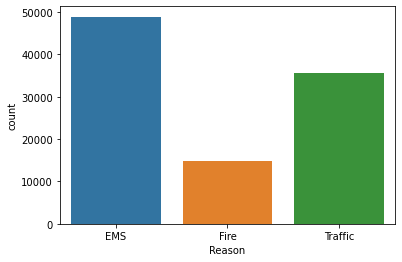

In [82]:
#create a countplot of 911 calls by reason
sns.countplot(x='Reason',data=df)


In [83]:
#what is the data type of object in timestamp column?
type(df['timeStamp'][0])

str

In [84]:
x=df['timeStamp'][0]
x

'2015-12-10 17:40:00'

In [85]:
#x.year

In [86]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])


In [87]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [88]:
x=df['timeStamp'][0]
x
#yr-month-date ,HR:Min:Sec

Timestamp('2015-12-10 17:40:00')

In [89]:
x.year

2015

In [90]:
x.day_name()

'Thursday'

In [91]:
x.hour

17

In [92]:
#create 3 new columns Hour,Month and Day of week from the column timeStamp
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)

In [93]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17


In [94]:
df['Month']=df['timeStamp'].apply(lambda x:x.month)

In [95]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12


In [96]:
df['Dayofweek']=df['timeStamp'].apply(lambda x:x.day_name())

In [97]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday


<AxesSubplot:xlabel='Dayofweek', ylabel='count'>

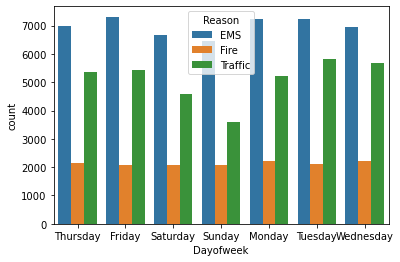

In [98]:
#create a countplot of day of week column with hue argument based of reason column
sns.countplot(x='Dayofweek',data=df,hue='Reason')

<AxesSubplot:xlabel='Month', ylabel='count'>

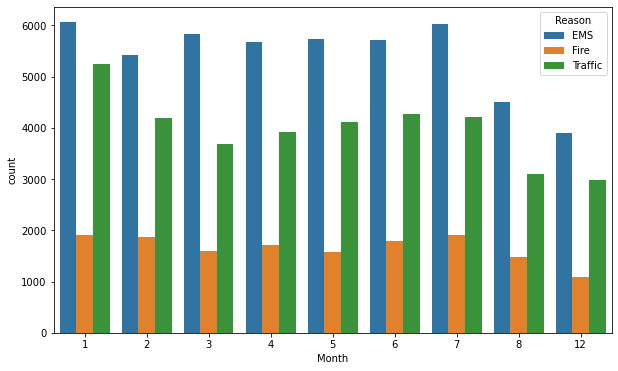

In [99]:
#create a countplot of month  column with hue argument based of reason column
plt.figure(figsize=(10,6))
sns.countplot(x='Month',data=df,hue='Reason')

In [100]:
#9,10 and 11 months are missing in countplot
df.groupby('Month')

In [101]:
bymonth=df.groupby('Month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Dayofweek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


<AxesSubplot:xlabel='Month'>

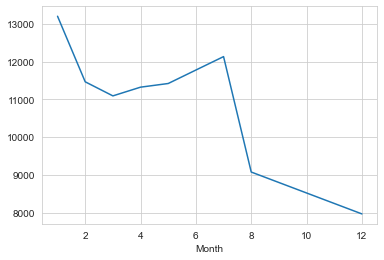

In [102]:
#create a simple plot of dataframe indicating the count of calls per month

sns.set_style('whitegrid')

bymonth['twp'].plot()

In [103]:
#create a new column called Date that contains date from timeStamp column.
df['Date']=df['timeStamp'].apply(lambda x:x.date())

In [104]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10


In [105]:
#groupby this date column with the count as aggreagte function and create a plot of counts of 911 calls
bydate=df.groupby('Date').count()
bydate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


<AxesSubplot:xlabel='Date'>

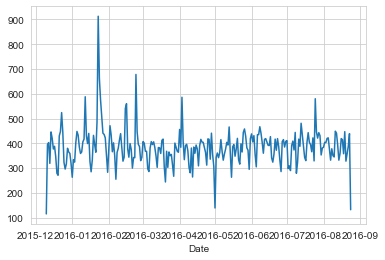

In [106]:
plt.tight_layout()
bydate['twp'].plot()

In [107]:
df[df['Reason']=='Traffic'].groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,43,43,43,35,43,43,43,41,43,43,43,43,43
2015-12-11,141,141,141,108,141,141,141,137,141,141,141,141,141
2015-12-12,146,146,146,109,146,146,146,144,146,146,146,146,146
2015-12-13,78,78,78,54,78,78,78,76,78,78,78,78,78
2015-12-14,186,186,186,150,186,186,186,184,186,186,186,186,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,117,117,117,93,117,117,117,116,117,117,117,117,117
2016-08-21,138,138,138,105,138,138,138,133,138,138,138,138,138
2016-08-22,156,156,156,127,156,156,156,152,156,156,156,156,156


Text(0.5, 1.0, 'Traffic')

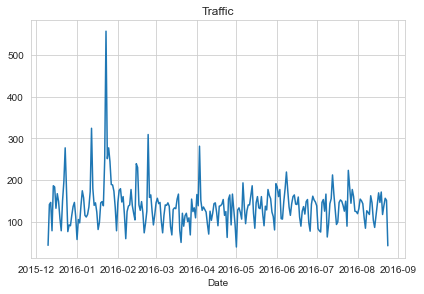

In [108]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic')

In [109]:
df[df['Reason']=='EMS'].groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189
2015-12-13,190,190,190,178,190,190,190,190,190,190,190,190,190
2015-12-14,222,222,222,201,222,222,222,222,222,222,222,222,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,159,159,159,139,159,159,159,159,159,159,159,159,159
2016-08-21,165,165,165,144,165,165,165,165,165,165,165,165,165
2016-08-22,182,182,182,163,182,182,182,182,182,182,182,182,182


Text(0.5, 1.0, 'EMS')

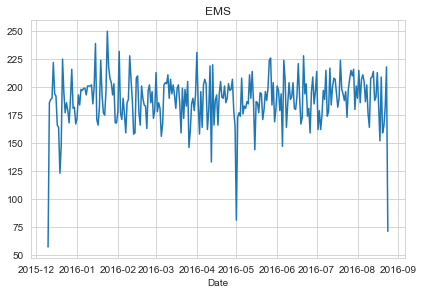

In [110]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS')

In [111]:
df[df['Reason']=='Fire'].groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-11,69,69,69,59,69,69,68,68,69,69,69,69,69
2015-12-12,68,68,68,53,68,68,68,68,68,68,68,68,68
2015-12-13,51,51,51,48,51,51,51,51,51,51,51,51,51
2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,52,52,52,47,52,52,52,52,52,52,52,52,52
2016-08-21,54,54,54,50,54,54,54,54,54,54,54,54,54
2016-08-22,51,51,51,46,51,51,50,50,51,51,51,51,51


Text(0.5, 1.0, 'Fire')

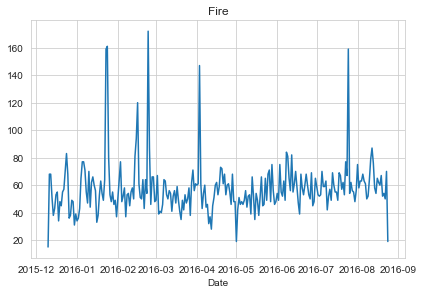

In [112]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire')

In [113]:
#heatmap 
#reconstruct the dataframe so that columns becomes the hours and index becomes the day of week
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10


In [114]:
df.corr()

,lat,lng,zip,e,Hour,Month
lat,1.000000,-0.199432,-0.245963,NaN,-0.002966,-0.010716
lng,-0.199432,1.000000,-0.508580,NaN,-0.007088,0.011319
zip,-0.245963,-0.508580,1.000000,NaN,0.006924,-0.005482
e,NaN,NaN,NaN,NaN,NaN,NaN
Hour,-0.002966,-0.007088,0.006924,NaN,1.000000,0.017841
Month,-0.010716,0.011319,-0.005482,NaN,0.017841,1.000000


In [115]:
#unstack method to create a heat map
#reconstruct the dataframe so that columns becomes the hours and index becomes the day of week
df.groupby(['Dayofweek','Hour'])

In [116]:
df.groupby(['Dayofweek','Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  Reason  \
Dayofweek Hour                                                                  
Friday    0     275  275   275  248    275        275  275   275  275     275   
          1     235  235   235  200    235        235  235   232  235     235   
          2     191  191   191  165    191        191  191   191  191     191   
          3     175  175   175  164    175        175  175   175  175     175   
          4     201  201   201  184    201        201  201   201  201     201   
...             ...  ...   ...  ...    ...        ...  ...   ...  ...     ...   
Wednesday 19    686  686   686  590    686        686  686   682  686     686   
          20    668  668   668  597    668        668  668   662  668     668   
          21    575  575   575  508    575        575  574   572  575     575   
          22    490  490   490  432    490        490  490   485  490     490   
          23    335  335   335  294    335        335  334   335  335     335   

                Month  Date  
Dayofweek Hour               
Friday    0       275   275  
          1       235   235  
          2       191   191  
          3       175   175  
          4       201   201  
...               ...   ...  
Wednesday 19      686   686  
          20      668   668  
          21      575   575  
          22      490   490  
          23      335   335  

[168 rows x 12 columns]

In [117]:
df.groupby(['Dayofweek','Hour']).count().unstack()

lat                                               ... Date       \
Hour        0    1    2    3    4    5    6    7    8    9   ...   14   15   
Dayofweek                                                    ...             
Friday     275  235  191  175  201  194  372  598  742  752  ...  932  980   
Monday     282  221  201  194  204  267  397  653  819  786  ...  869  913   
Saturday   375  301  263  260  224  231  257  391  459  640  ...  789  796   
Sunday     383  306  286  268  242  240  300  402  483  620  ...  684  691   
Thursday   278  202  233  159  182  203  362  570  777  828  ...  876  969   
Tuesday    269  240  186  170  209  239  415  655  889  880  ...  943  938   
Wednesday  250  216  189  209  156  255  410  701  875  808  ...  904  867   

                                                     
Hour         16    17   18   19   20   21   22   23  
Dayofweek                                            
Friday     1039   980  820  696  667  559  514  474  
Monday      989   997  885  746  613  497  472  325  
Saturday    848   757  778  696  628  572  506  467  
Sunday      663   714  670  655  537  461  415  330  
Thursday    935  1013  810  698  617  553  424  354  
Tuesday    1026  1019  905  731  647  571  462  274  
Wednesday   990  1037  894  686  668  575  490  335  

[7 rows x 288 columns]

In [118]:
dayHour=df.groupby(['Dayofweek','Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dayofweek,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='Hour', ylabel='Dayofweek'>

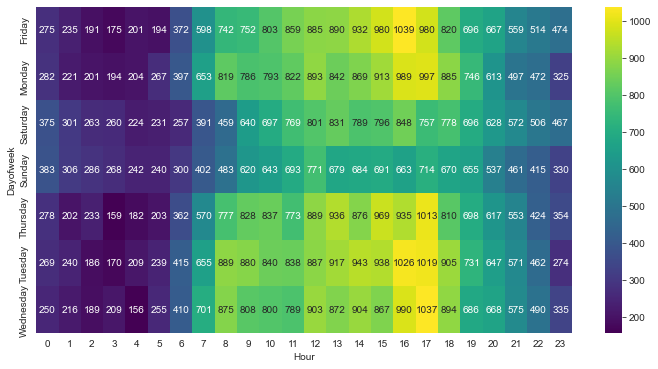

In [119]:
#create a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,annot=True,fmt='d',cmap='viridis')

In [120]:
dayMonth=df.groupby(['Dayofweek','Month']).count()['Reason'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Dayofweek,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='Dayofweek'>

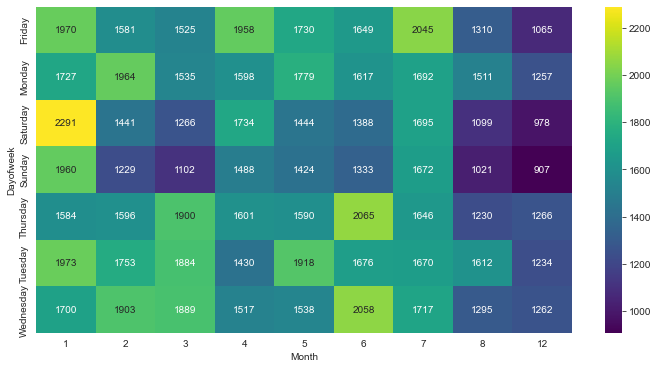

In [121]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,annot=True,fmt='d',cmap='viridis')

# project base on pandas and seaborn project 2

In [1]:
#pandas-datareader
#pip install pandas_datareader
#!pip install pandas_datareader

#In this project we will focus on EDA (Exploratory data analysis) of stock prices.we will focus on the bank stocks and see how
#they are progressed throught the financial crisis all the way to early 2016.

In [123]:
import datetime
#from pandas_datareader import data,wb
from pandas_datareader import data,wb


In [124]:
#Get the data-
#we need to get the data using pandas datareader.
#we will get stock-information for the following banks.
#1.Bank of America
#2.citigroup
#3.Goldman sachs
#4.JPMorgan Chase
#5.Morgan Stanley
#6.Wells Forgo

In [125]:
#figure out how to get stock data from Jan 2006 to Jan 2016 for each of these banks.
#set each bank to be a seperate dataframe with the variable name for that bank being its ticker symbol.
#This will involve few steps .
#1.Use datetime to set start and end datetime objects.
#2.figure out the ticker symbol for each bank.
#3.figure out how to use datareader to grab the info on the stock.
import datetime
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

In [126]:
#Bank of America
BAC=data.DataReader("BAC","yahoo",start,end)
BAC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.942665
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.582180
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.625427
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.574947
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.596596
...,...,...,...,...,...,...
2015-12-24,17.379999,17.219999,17.320000,17.270000,29369400.0,15.356147
2015-12-28,17.230000,16.980000,17.219999,17.129999,41777500.0,15.231660
2015-12-29,17.350000,17.160000,17.250000,17.280001,45670400.0,15.365033


In [127]:
BAC['Close'].max()

54.900001525878906

In [128]:
#citigroup
C=data.DataReader("C","yahoo",start,end)
C

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,365.387695
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960.0,358.641785
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160.0,360.420868
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210.0,360.420868
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740.0,358.715881
...,...,...,...,...,...,...
2015-12-24,52.970001,52.450001,52.480000,52.709999,4671200.0,45.319016
2015-12-28,52.570000,51.959999,52.570000,52.380001,8761700.0,45.035297
2015-12-29,53.220001,52.740002,52.759998,52.980000,10155100.0,45.551167


In [129]:
#Goldman Sachs
GS=data.DataReader("GS","yahoo",start,end)
GS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,103.863976
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,102.429359
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,102.389076
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,103.839798
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,105.089050
...,...,...,...,...,...,...
2015-12-24,183.169998,182.020004,182.270004,182.470001,1107600.0,164.573105
2015-12-28,181.929993,179.839996,181.770004,181.619995,1723300.0,163.806458
2015-12-29,184.179993,182.500000,182.820007,183.529999,1848900.0,165.529144


In [130]:
#JPMorgan Chase
JPM=data.DataReader("JPM","yahoo",start,end)
JPM

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,26.345470
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,26.193417
2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0,26.272758
2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900.0,26.457869
2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200.0,26.887592
...,...,...,...,...,...,...
2015-12-24,66.889999,66.320000,66.620003,66.599998,4468200.0,56.105709
2015-12-28,66.449997,65.709999,66.290001,66.379997,6610600.0,55.920380
2015-12-29,67.300003,66.739998,66.839996,67.070000,9820800.0,56.501644


In [131]:
#Morgan Stanley
MS=data.DataReader("MS","yahoo",start,end)
MS


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,35.864334
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,35.888935
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,35.987343
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,36.024258
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,36.405602
...,...,...,...,...,...,...
2015-12-24,32.709999,32.439999,32.570000,32.480000,2798200.0,27.839371
2015-12-28,32.360001,31.950001,32.360001,32.169998,5420300.0,27.573662
2015-12-29,32.700001,32.330002,32.439999,32.549999,6388200.0,27.899364


In [132]:
#Wells Forgo
WFC=data.DataReader("WFC","yahoo",start,end)
WFC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.353485
2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,20.117411
2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,20.095078
2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,20.213118
2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,20.209927
...,...,...,...,...,...,...
2015-12-24,55.090000,54.709999,54.970001,54.820000,4999400.0,45.552628
2015-12-28,54.779999,54.169998,54.549999,54.680000,8288800.0,45.436295
2015-12-29,55.349998,54.990002,55.110001,55.290001,7894900.0,45.943165


In [133]:
df=data.DataReader(['BAC','C','GS','JPM','MS','WFC'],'yahoo',start,end)
df.head()

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  33.942665  365.387634  103.863991  26.345480  35.864334   
2006-01-04  33.582180  358.641754  102.429367  26.193430  35.888950   
2006-01-05  33.625435  360.420746  102.389091  26.272753  35.987347   
2006-01-06  33.574951  360.420746  103.839790  26.457870  36.024242   
2006-01-09  33.596588  358.715881  105.089035  26.887589  36.405594   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  20.353487  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  20.117409  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  20.095079  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  20.213112  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  20.209936  46.599998  483.899994  130.389999  40.669998  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM         MS        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400.0   

Attributes                                                           
Symbols             C         GS         JPM         MS         WFC  
Date                                                                 
2006-01-03  1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04  1870960.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05  1143160.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06  1370210.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09  1680740.0  4723500.0  16575200.0  4144500.0   5619600.0  

[5 rows x 36 columns]

In [134]:
#create a list of ticker symbols in alphabetical order
tickers=['BAC','C','GS','JPM','MS','WFC']

In [135]:
#use pd.concat to concatenate the bank dataframes to a single dataframe called bank_stocks.set the keys argument eual to 
#the ticker list
import pandas as pd
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.942665   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.582180   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.625427   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.574947   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.596596   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.864334  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.888935  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.987343  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.024258  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.405602  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.353485  
2006-01-04  31.530001  10870000.0  20.117411  
2006-01-05  31.495001  10158000.0  20.095078  
2006-01-06  31.680000   8403800.0  20.213118  
2006-01-09  31.674999   5619600.0  20.209927  

[5 rows x 36 columns]

In [136]:
#set the column name levels
bank_stocks.columns.names=['Bank Tickers','Stock Info']

In [137]:
bank_stocks.head()

Bank Tickers        BAC                                               \
Stock Info         High        Low       Open      Close      Volume   
Date                                                                   
2006-01-03    47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04    47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05    46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06    46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09    46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Tickers                      C                                      ...  \
Stock Info    Adj Close        High         Low        Open       Close  ...   
Date                                                                     ...   
2006-01-03    33.942665  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04    33.582180  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05    33.625427  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06    33.574947  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09    33.596596  487.399994  483.000000  486.000000  483.899994  ...   

Bank Tickers         MS                                         WFC  \
Stock Info         Open      Close     Volume  Adj Close       High   
Date                                                                  
2006-01-03    57.169998  58.310001  5377000.0  35.864334  31.975000   
2006-01-04    58.700001  58.349998  7977800.0  35.888935  31.820000   
2006-01-05    58.549999  58.509998  5778000.0  35.987343  31.555000   
2006-01-06    58.770000  58.570000  6889800.0  36.024258  31.775000   
2006-01-09    58.630001  59.189999  4144500.0  36.405602  31.825001   

Bank Tickers                                                          
Stock Info          Low       Open      Close      Volume  Adj Close  
Date                                                                  
2006-01-03    31.195000  31.600000  31.900000  11016400.0  20.353485  
2006-01-04    31.365000  31.799999  31.530001  10870000.0  20.117411  
2006-01-05    31.309999  31.500000  31.495001  10158000.0  20.095078  
2006-01-06    31.385000  31.580000  31.680000   8403800.0  20.213118  
2006-01-09    31.555000  31.674999  31.674999   5619600.0  20.209927  

[5 rows x 36 columns]

In [138]:
#what is the max close price for each banks stock throught the time period?
#cross section method
bank_stocks.xs(key='Close',level='Stock Info',axis=1).max()

Bank Tickers
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [139]:
#create a new empty dataframe .This dataframe will contain the returns for each banks stock.
returns=pd.DataFrame()
returns

""


In [140]:
#we can use pct_change() method on close column to create a column representing this return value.
#create a for loop that goes and for each Bank Stock tickers creates this return column .
tickers=['BAC','C','GS','JPM','MS','WFC']
for tick in tickers:
    returns[tick + ' Return']=bank_stocks[tick]['Close'].pct_change()
    

In [141]:
returns.head(10)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789
2006-01-11,-0.002380,0.009065,-0.000454,-0.000737,0.005910,0.005213
2006-01-12,-0.006508,0.001021,0.002122,-0.018428,-0.001679,-0.011630
2006-01-13,0.000000,-0.002243,0.007637,-0.000751,-0.001513,0.005724


In [142]:
returns[1:]

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


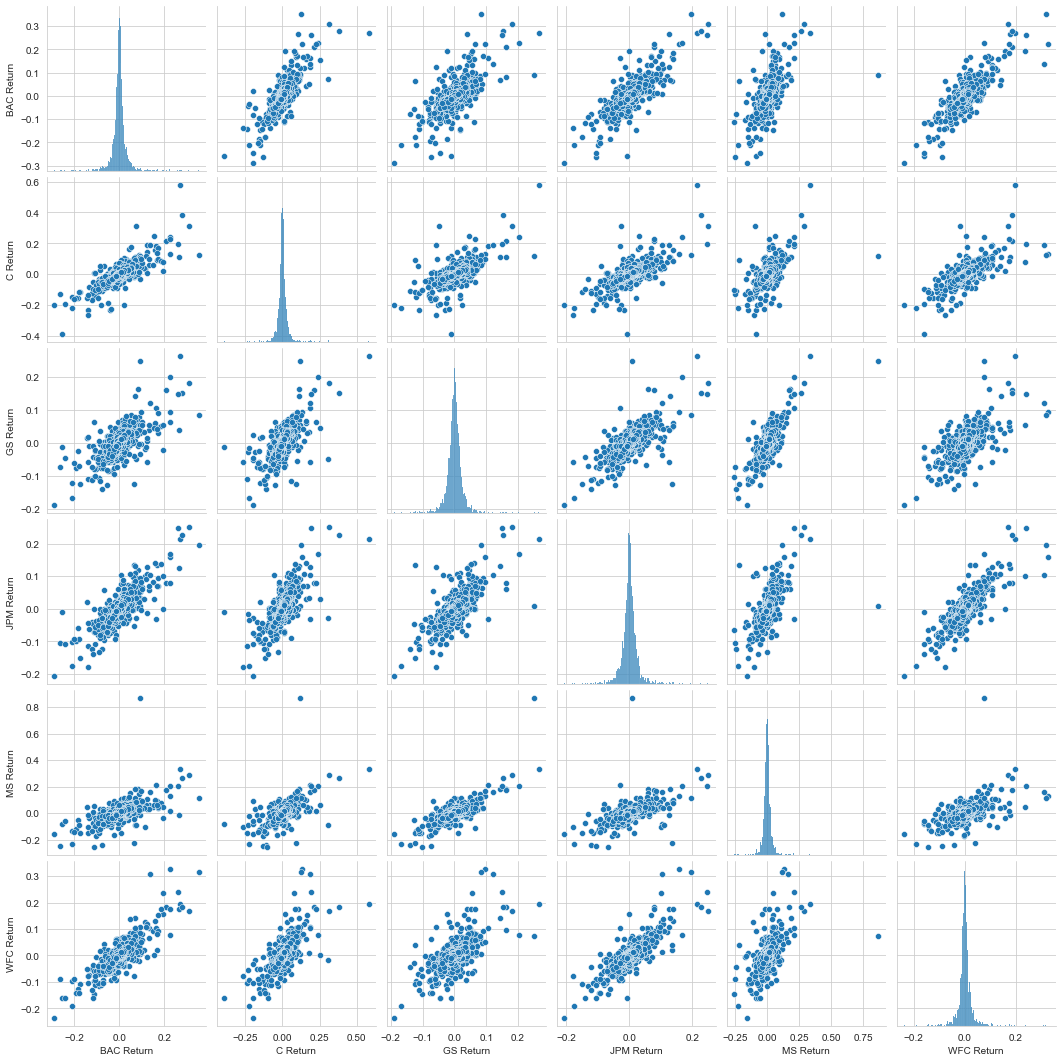

In [143]:
#create a pairplot using seaborn of returns dataframe
import seaborn as sns
sns.pairplot(returns[1:])

In [144]:
#MS Stock crashes as seen in fig.

In [145]:
#using this returns dataframe figure out on what dates each bank stock had the best and worst single day return?
#each banks max and min return value
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [146]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [147]:
#JPM have largest drop on 20-01-2009 and biggest gain on  the next day 21-01-2009

In [148]:
#take a look at std of the returns .which banks stock would you classify as the riskest over the entire reutime period
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [149]:
#riskest is citigroup

In [150]:
#which banks stock would you classify as the riskest for year 2015?
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [151]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [152]:
#for 2015 the stock of Morgan Stanley was risk

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

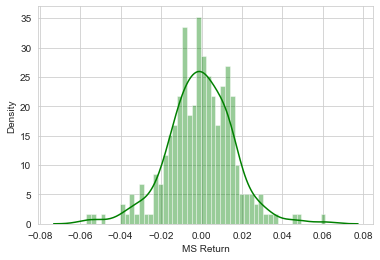

In [153]:
## distplot for 2015 return for Morgan Stanley
sns.set_style('whitegrid')
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=50)

In [154]:
#2008 return for citigroup
returns.loc['2008-01-01':'2008-12-31'].std()

BAC Return    0.062934
C Return      0.073523
GS Return     0.050015
JPM Return    0.053134
MS Return     0.087604
WFC Return    0.052439
dtype: float64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

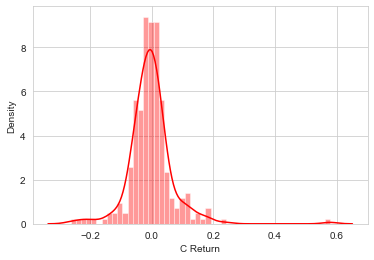

In [155]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=50)

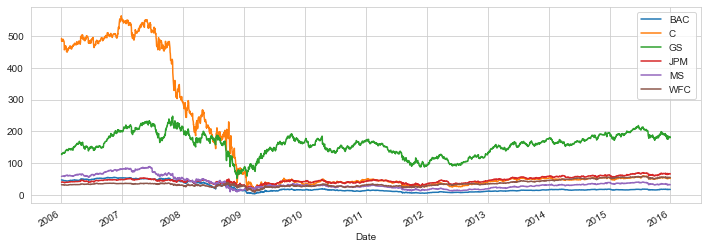

In [156]:
#create a line plot showing close price for each bank for the entire index of time.
import matplotlib.pyplot as plt
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend() 

In [157]:
#citigroup really crashed after 2008

<AxesSubplot:xlabel='Date'>

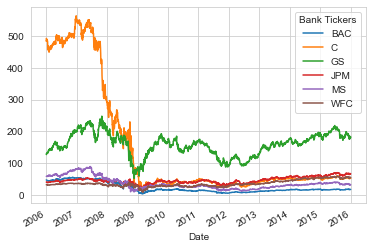

In [158]:
#by cross section

bank_stocks.xs(key='Close',level='Stock Info',axis=1).plot()